In [1]:
# Import pandas
import pandas as pd
# Import the required dependencies from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Set the column width to view the text message data.
pd.set_option('max_colwidth', 200)



/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [ ]:
#!pip install gradio

In [2]:
# Import Gradio
import gradio as gr

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def sms_classification(sms_text_df):
    """
    Perform SMS classification using a pipeline with TF-IDF vectorization and
    Linear Support Vector Classification.

    Parameters:
    - sms_text_df (pd.DataFrame): DataFrame containing 'text_message' and 
      'label' columns for SMS classification.

    Returns:
    - text_clf (Pipeline): Fitted pipeline model for SMS classification.

    This function takes a DataFrame with 'text_message' and 'label' columns, splits the data into
    training and testing sets, builds a pipeline with TF-IDF vectorization and Linear Support Vector
    Classification, and fits the model to the training data. 
    The fitted pipeline is returned to make future predictions.
    """
    # Set the features variable to the text message column.
    X = sms_text_df['text_message']

    # Set the target variable to the "label" column.
    y = sms_text_df['label']

    # Split data into training and testing and set the test_size = 33%
    X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.33, random_state=42
                    )

    # Build a pipeline to transform the test set to compare to the training set.
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', LinearSVC())
    ])

    # Fit the model to the transformed training data and return model.
    text_clf = pipeline.fit(X_train, y_train)
    return text_clf

In [8]:
# Load the dataset into a DataFrame
df = pd.read_csv('Resources/SMSSpamCollection.csv', encoding='latin-1')

In [9]:
# Call the sms_classification function with the DataFrame and set the result to the "text_clf" variable
text_clf = sms_classification(df)

In [11]:
# Create a function called `sms_prediction` that takes in the SMS text and predicts the whether the text is "not spam" or "spam". 
# The function should return the SMS message, and say whether the text is "not spam" or "spam".
def sms_prediction(text):
    """
    Predict the spam/ham classification of a given text message using a pre-trained model.

    Parameters:
    - text (str): The text message to be classified.

    Returns:
    - str: A message indicating whether the text message is classified as spam or not.

    This function takes a text message and a pre-trained pipeline model, then predicts the
    spam/ham classification of the text. The result is a message stating whether the text is
    classified as spam or not.
    """
    # Create a variable that will hold the prediction of a new text.
    prediction = text_clf.predict([text])
    # Using a conditional if the prediction is "ham" return the message:
    # f'The text message: "{text}", is not spam.' Else, return f'The text message: "{text}", is spam.'
    if prediction == 'ham':
        return f'NOT SPAM, The text message: "{text}", is not spam.'
    else:
        return f'SPAM. The text message: "{text}", is spam.'

In [14]:
# Create a sms_app that takes a textbox for the inputs and has a textbox for the output.  
# Povide labels for each textbox. 
app = gr.Interface(fn=sms_prediction, 
                  title="Ham or Spam SMS Classifier",
                  inputs=gr.Textbox(label="What is the text message you want to test?"),
                  outputs=gr.Textbox(lines=2, 
                                      label="Our app has determined:", 
                                      show_copy_button=True
                                    ))
    
    
# Launch the app.
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://baafc7b479eea63edc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Test the following text messages. 

---

1. You are a lucky winner of $5000!
not spam
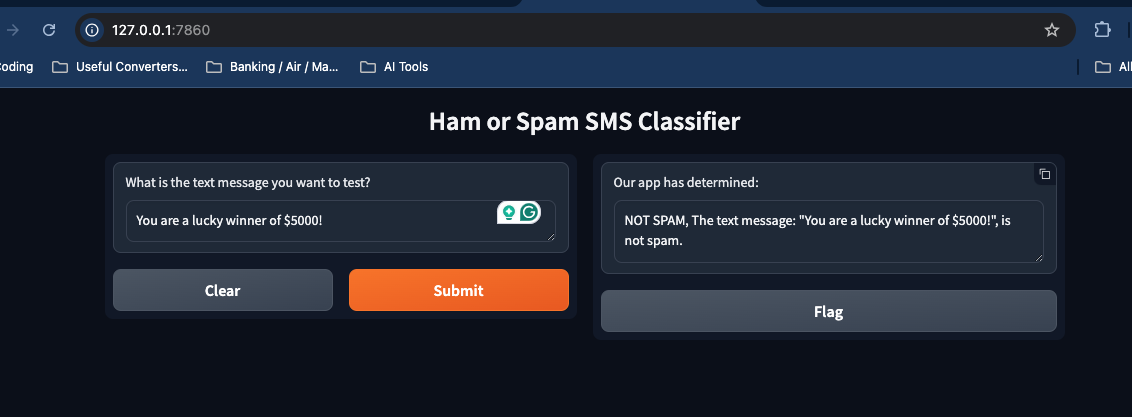
2. You won 2 free tickets to the Super Bowl.
not spam
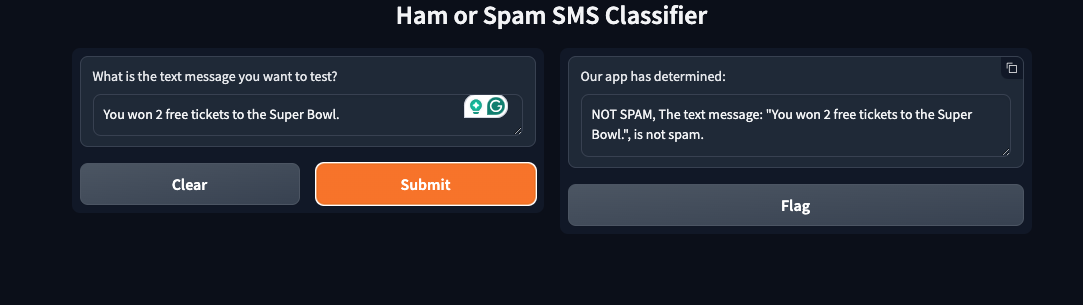
3. You won 2 free tickets to the Super Bowl text us to claim your prize.
Spam
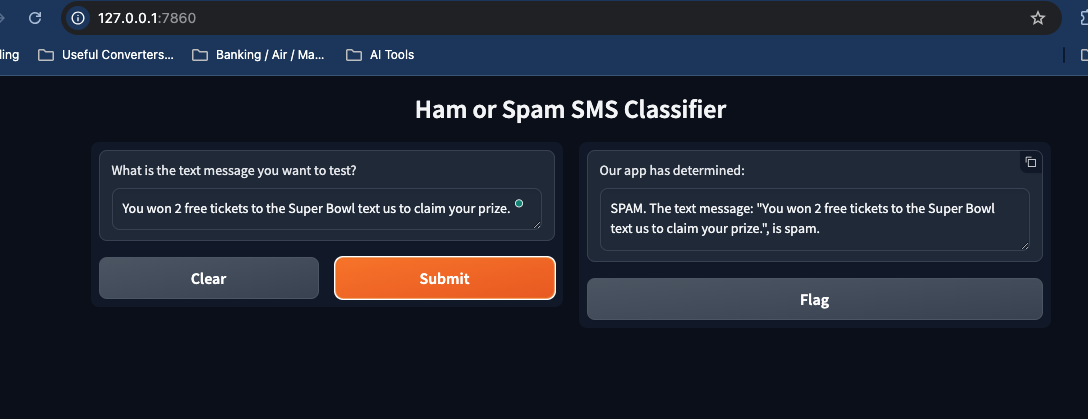
4. Thanks for registering. Text 4343 to receive free updates on medicare.
Spam
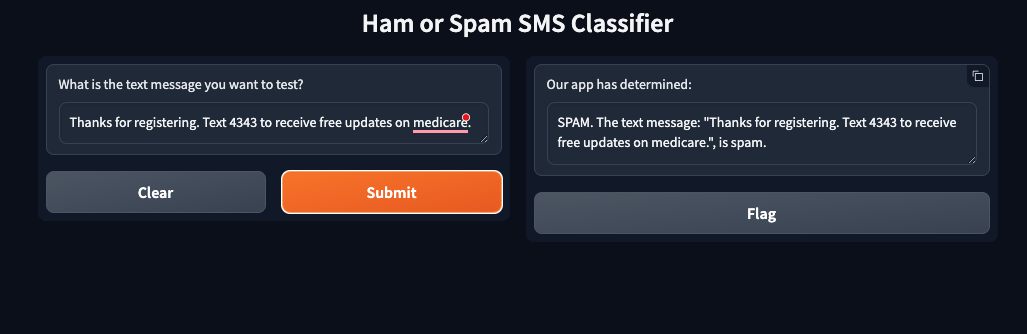